In [1]:
import re
import string
import nltk
import nlpaug.augmenter.word as naw
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Download necessary resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('stopwords')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


df = pd.read_csv('offensive.csv')
df.head()



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dasad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dasad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dasad\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dasad\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dasad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


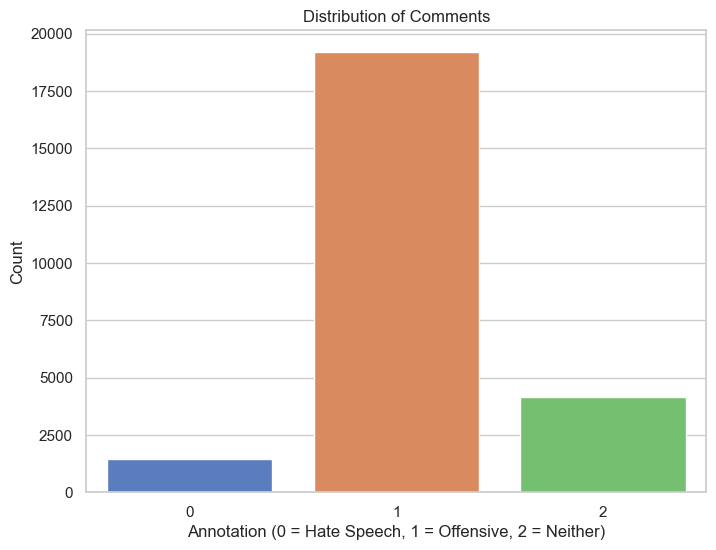

In [2]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, palette='muted')
plt.title('Distribution of Comments')
plt.xlabel('Annotation (0 = Hate Speech, 1 = Offensive, 2 = Neither)')
plt.ylabel('Count')
plt.show()


In [3]:
print("Sample Hate Speech Comments:")
print(df[df['class'] == 0]['tweet'].sample(3, random_state=42).tolist())

print("\nSample Offensive Comments:")
print(df[df['class'] == 1]['tweet'].sample(3, random_state=42).tolist())


print("\nSample Neutral Comments:")
print(df[df['class'] == 2]['tweet'].sample(3, random_state=42).tolist())


Sample Hate Speech Comments:
['@AustinG1135 I do not like talking to you faggot and I did but in a nicely way fag', 'RT @mitchmancuso: @BrantPrintup:What straight guys take a picture of themselves naked in a hot tun.What fags @jakesiwy @Ryan_Murphy3 @Randy&#8230;', '@clinchmtn316 @sixonesixband AMERICA today, the rule of thumb is: when in doubt, blame "whitey"']

Sample Offensive Comments:
['Why is it everytime I go to cracker barrel the girl with great tits that seats you who is your waitress nope its the chick with 2 teeth', "Run that nigga, you don't want that nigga, but I need a bad bitch that's hotter than me", "I need a girl from Jamaica I can't fuck with these basic black bitches"]

Sample Neutral Comments:
['RT @chicagotribune: Chicago will not refund $7.7 million made from red light tickets issued after yellow lights were shortened http://t.co/&#8230;', 'Sometimes, even I gotta tell these hoes to grow up smh', '&#8216;Chillin&#8217; With My Homie Or What&#8217;s Left Of Him&#8

In [4]:
# Dictionary for common contractions
contractions = {
    "can't": "cannot",
    "cant": "cannot",  # added uncontracted version
    "won't": "will not",
    "wont": "will not",  # added uncontracted version
    "i'm": "i am",
    "im": "i am",  # added uncontracted version
    "i've": "i have",
    "ive": "i have",  # added uncontracted version
    "i'll": "i will",
    "ill": "i will",  # added uncontracted version
    "you've": "you have",
    "youve": "you have",  # added uncontracted version
    "you'll": "you will",
    "youll": "you will",  # added uncontracted version
    "he's": "he is",
    "hes": "he is",  # added uncontracted version
    "she's": "she is",
    "shes": "she is",  # added uncontracted version
    "it's": "it is",
    "its": "it is",  # added uncontracted version
    "they're": "they are",
    "theyre": "they are",  # added uncontracted version
    "they've": "they have",
    "theyve": "they have",  # added uncontracted version
    "they'll": "they will",
    "theyll": "they will",  # added uncontracted version
    "we're": "we are",
    "weve": "we are",  # added uncontracted version
    "we've": "we have",
    "well": "we will",  # added uncontracted version
    "we'll": "we will",
    "thats": "that is",  # fixed spelling to be contraction-based
    "there's": "there is",
    "theres": "there is",  # added uncontracted version
    "what's": "what is",
    "whats": "what is",  # added uncontracted version
    "who's": "who is",
    "whos": "who is",  # added uncontracted version
    "how's": "how is",
    "hows": "how is",  # added uncontracted version
    "let's": "let us",
    "lets": "let us",  # added uncontracted version
    "haven't": "have not",
    "havent": "have not",  # added uncontracted version
    "hasn't": "has not",
    "hasnt": "has not",  # added uncontracted version
    "hadn't": "had not",
    "hadnt": "had not",  # added uncontracted version
    "don't": "do not",
    "dont": "do not",  # added uncontracted version
    "doesn't": "does not",
    "doesnt": "does not",  # added uncontracted version
    "didn't": "did not",
    "didnt": "did not",  # added uncontracted version
    "isn't": "is not",
    "isnt": "is not",  # added uncontracted version
    "aren't": "are not",
    "arent": "are not",  # added uncontracted version
    "wasn't": "was not",
    "wasnt": "was not",  # added uncontracted version
    "weren't": "were not",
    "werent": "were not",  # added uncontracted version
    "wouldn't": "would not",
    "wouldnt": "would not",  # added uncontracted version
    "shouldn't": "should not",
    "shouldnt": "should not",  # added uncontracted version
    "couldn't": "could not",
    "couldnt": "could not",  # added uncontracted version
    "mightn't": "might not",
    "mightnt": "might not",  # added uncontracted version
    "mustn't": "must not",
    "mustnt": "must not",  # added uncontracted version
    "needn't": "need not",
    "neednt": "need not",  # added uncontracted version
    "oughtn't": "ought not",
    "oughtnt": "ought not"  # added uncontracted version
}

def expand_contractions(text):
    for contraction, expansion in contractions.items():
        text = re.sub(r'\b' + re.escape(contraction) + r'\b', expansion, text)
    return text


In [5]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 1. Expand contractions (implement `expand_contractions` as needed)
    text = expand_contractions(text)
    
    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # 3. Remove usernames (e.g., @username)
    text = re.sub(r'@\w+', '', text)
    
    # 4. Remove all instances of "rt" (case-insensitive)
    text = re.sub(r'\brt\b', '', text, flags=re.IGNORECASE)
    
    # 5. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 6. Lowercase the text
    text = text.lower()
    
    # 7. Tokenize the text
    tokens = word_tokenize(text)
    
    # 8. Stemming and Lemmatization
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]
    
    # 9. Join tokens back to string
    return ' '.join(lemmatized_tokens)

# Apply preprocessing to the DataFrame
df['processed_content'] = df['tweet'].apply(preprocess_text)


In [6]:

df[['tweet', 'processed_content']]

,tweet,processed_content
0,!!! RT @mayasolovely: As a woman you shouldn't...,a a woman you should not complain about clean ...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat coldtyga dwn bad for cuffin dat hoe in...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she start to cr...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,she look like a tranni
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,the shit you hear about me might be true or it...
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,you a muthafin lie 8220 right hi tl is trash 8...
24779,"you've gone and broke the wrong heart baby, an...",you have gone and broke the wrong heart babi a...
24780,young buck wanna eat!!.. dat nigguh like I ain...,young buck wan na eat dat nigguh like i aint f...
24781,youu got wild bitches tellin you lies,youu got wild bitch tellin you lie


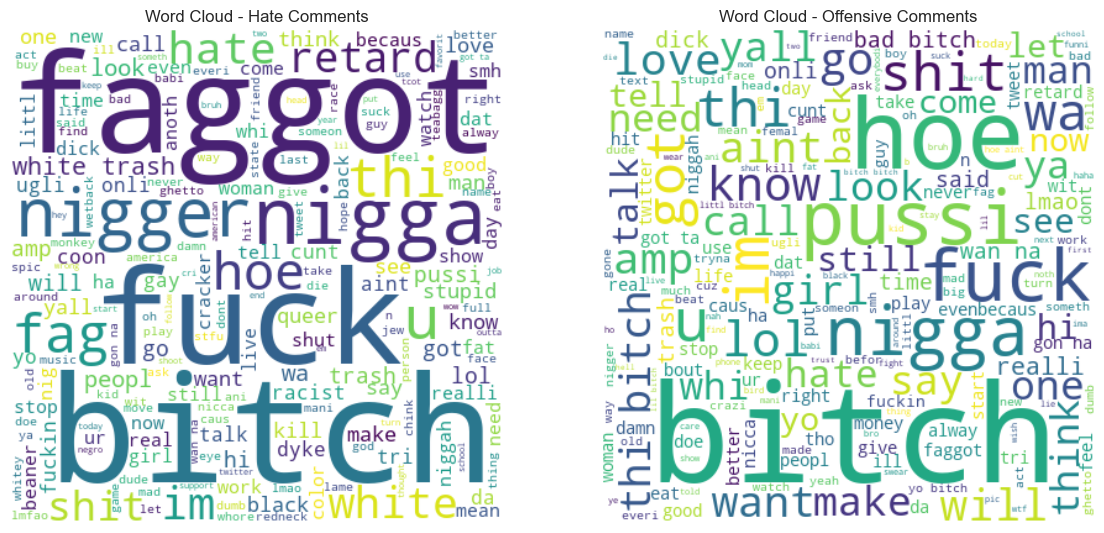

In [7]:
from wordcloud import WordCloud

# Combine all processed non-troll and troll comments
hate_text = ' '.join(df[df['class'] == 0]['processed_content'])
offensive_text = ' '.join(df[df['class'] == 1]['processed_content'])
neutral_text = ' '.join(df[df['class'] == 2]['processed_content'])



# Generate word clouds
plt.figure(figsize=(14, 7))

# Word cloud for non-troll comments
plt.subplot(1, 2, 1)
wordcloud_non_troll = WordCloud(width=400, height=400, background_color='white').generate(hate_text)
plt.imshow(wordcloud_non_troll, interpolation='bilinear')
plt.title('Word Cloud - Hate Comments')
plt.axis('off')

# Word cloud for troll comments
plt.subplot(1, 2, 2)
wordcloud_troll = WordCloud(width=400, height=400, background_color='white').generate(offensive_text)
plt.imshow(wordcloud_troll, interpolation='bilinear')
plt.title('Word Cloud - Offensive Comments')
plt.axis('off')





plt.show()


In [8]:
import fasttext
import numpy as np
from tqdm import tqdm
import torch
from transformers import BertTokenizer, BertModel

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Load pre-trained FastText model (this is the FastText English model)
ft = fasttext.load_model('cc.en.300.bin')

# Function to get BERT embeddings
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    
    with torch.no_grad():
        outputs = bert_model(**inputs)
    
    # Get embeddings from the [CLS] token
    embeddings = outputs.last_hidden_state[0, 0, :].cpu().numpy()  
    return embeddings

# Function to get FastText embeddings
def get_fasttext_embeddings(text):
    # FastText averages the word embeddings in the text
    words = text.split()
    embeddings = np.zeros(300)  # FastText embedding size is 300
    count = 0
    for word in words:
        embeddings += ft.get_word_vector(word)
        count += 1
    if count > 0:
        embeddings /= count  # Average the word embeddings
    return embeddings

# Initialize lists to hold individual and concatenated embeddings
bert_embeddings = []
fasttext_embeddings = []
final_embeddings = []


from sklearn.model_selection import train_test_split

# Split the data into training and test sets
df, tdf = train_test_split(
    df,
    test_size=0.2,
    random_state=42
)


# Apply BERT and FastText embedding extraction with progress bar
for text in tqdm(df['processed_content'], desc="Extracting embeddings", unit="text"):
    # Get BERT and FastText embeddings
    bert_emb = get_bert_embeddings(text)
    fasttext_emb = get_fasttext_embeddings(text)
    
    # Store embeddings in their respective lists
    bert_embeddings.append(bert_emb)
    fasttext_embeddings.append(fasttext_emb)
    
    # Concatenate the embeddings and store them
    combined_emb = np.concatenate((bert_emb, fasttext_emb))  # 768 (BERT) + 300 (FastText) = 1068
    final_embeddings.append(combined_emb)

# Store embeddings in the DataFrame as separate columns
df['bert_embeddings'] = bert_embeddings
df['fasttext_embeddings'] = fasttext_embeddings
df['combined_embeddings'] = final_embeddings






Using device: cuda


Extracting embeddings: 100%|██████████| 19826/19826 [02:52<00:00, 115.20text/s]


In [9]:


bert_embeddings = []
fasttext_embeddings = []
final_embeddings = []

for text in tqdm(tdf['processed_content'], desc="Extracting embeddings", unit="text"):
    # Get BERT and FastText embeddings
    bert_emb = get_bert_embeddings(text)
    fasttext_emb = get_fasttext_embeddings(text)
    
    # Store embeddings in their respective lists
    bert_embeddings.append(bert_emb)
    fasttext_embeddings.append(fasttext_emb)
    
    # Concatenate the embeddings and store them
    combined_emb = np.concatenate((bert_emb, fasttext_emb))  # 768 (BERT) + 300 (FastText) = 1068
    final_embeddings.append(combined_emb)

# Store embeddings in the DataFrame as separate columns
tdf['bert_embeddings'] = bert_embeddings
tdf['fasttext_embeddings'] = fasttext_embeddings
tdf['combined_embeddings'] = final_embeddings

Extracting embeddings: 100%|██████████| 4957/4957 [00:43<00:00, 114.07text/s]


In [10]:
# Display a sample of the DataFrame to confirm the columns
df[['bert_embeddings', 'fasttext_embeddings', 'combined_embeddings']].head()

,bert_embeddings,fasttext_embeddings,combined_embeddings
15272,"[-0.12268081, 0.29412165, 0.09223749, 0.029913...","[-0.02481198499995314, -0.0613503695425132, -0...","[-0.12268081307411194, 0.294121652841568, 0.09..."
9351,"[-0.23280855, 0.4890131, 0.10426857, -0.153339...","[-0.0131170307577122, -0.04529069496978385, -0...","[-0.23280854523181915, 0.48901310563087463, 0...."
20323,"[-0.2173444, 0.20518604, 0.094818406, 0.166892...","[-0.002847415569704026, -0.04130622069351375, ...","[-0.21734440326690674, 0.20518603920936584, 0...."
3638,"[-0.4100824, 0.04934697, -0.15092784, -0.12882...","[0.018315576016902924, -0.10881751247992118, -...","[-0.4100823998451233, 0.04934696853160858, -0...."
20579,"[-0.05816528, 0.21461684, -0.20331438, 0.01327...","[-0.005502260290086269, -0.11535671632736921, ...","[-0.058165278285741806, 0.2146168351173401, -0..."


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

class CNNFeatureExtractor(nn.Module):
    def __init__(self, input_length=1068):
        super(CNNFeatureExtractor, self).__init__()
        
        # Small scale convolution (kernel size 3)
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool1d(kernel_size=2)
        
        # Medium scale convolution (kernel size 5)
        self.conv2 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=5, padding=2)
        self.pool2 = nn.MaxPool1d(kernel_size=2)
        
        # Large scale convolution (kernel size 7)
        self.conv3 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=7, padding=3)
        self.pool3 = nn.MaxPool1d(kernel_size=2)
    
    def forward(self, x):
        # Small scale convolution
        x1 = self.conv1(x)
        x1 = F.relu(x1)
        x1 = self.pool1(x1)
        
        # Medium scale convolution
        x2 = self.conv2(x)
        x2 = F.relu(x2)
        x2 = self.pool2(x2)
        
        # Large scale convolution
        x3 = self.conv3(x)
        x3 = F.relu(x3)
        x3 = self.pool3(x3)
        
        # Concatenate the outputs
        x = torch.cat((x1, x2, x3), dim=1)
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        return x

def extract_cnn_features(df):
    # Initialize the feature extractor
    extractor = CNNFeatureExtractor()
    extractor.eval()  # Set to evaluation mode
    
    # Prepare to store features
    cnn_features_list = []
    
    # Process each embedding
    for embedding in df['combined_embeddings']:
        # Convert numpy array to tensor
        # Ensure shape is (1, 1, 1068)
        tensor_input = torch.tensor(embedding, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
        
        # Extract features
        with torch.no_grad():
            features = extractor(tensor_input)
        
        # Convert to numpy and flatten
        cnn_features_list.append(features.numpy().flatten())
    
    # Store features in DataFrame
    df['cnn_features'] = cnn_features_list
    
    return df

# Usage
df = extract_cnn_features(df)
tdf = extract_cnn_features(tdf)

In [12]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,processed_content,bert_embeddings,fasttext_embeddings,combined_embeddings,cnn_features
15272,15632,3,2,0,1,0,RT @FunSizedYogi: @TheBlackVoice well how else...,we will how el will white ppl get u to forget ...,"[-0.12268081, 0.29412165, 0.09223749, 0.029913...","[-0.02481198499995314, -0.0613503695425132, -0...","[-0.12268081307411194, 0.294121652841568, 0.09...","[0.43307745, 0.166356, 0.50909424, 0.19485371,..."
9351,9609,3,0,0,3,2,Funny thing is....it's not just the people doi...,funni thing isit is not just the peopl do it i...,"[-0.23280855, 0.4890131, 0.10426857, -0.153339...","[-0.0131170307577122, -0.04529069496978385, -0...","[-0.23280854523181915, 0.48901310563087463, 0....","[0.5864761, 0.056549862, 0.5994091, 0.3778282,..."
20323,20769,3,0,3,0,1,"RT @winkSOSA: ""@AintShitSweet__: ""@Rakwon_OGOD...",nigga mess with the wrong bitch 128557128514 1...,"[-0.2173444, 0.20518604, 0.094818406, 0.166892...","[-0.002847415569704026, -0.04130622069351375, ...","[-0.21734440326690674, 0.20518603920936584, 0....","[0.42827225, 0.2470311, 0.4097849, 0.13358486,..."
3638,3737,3,0,3,0,1,@Jbrendaro30 @ZGabrail @ramsin1995 @GabeEli8 @...,bitch as nigggaaa,"[-0.4100824, 0.04934697, -0.15092784, -0.12882...","[0.018315576016902924, -0.10881751247992118, -...","[-0.4100823998451233, 0.04934696853160858, -0....","[0.43193692, 0.21549994, 0.61786157, 0.1768916..."
20579,21026,6,0,6,0,1,S/o that real bitch,so that real bitch,"[-0.05816528, 0.21461684, -0.20331438, 0.01327...","[-0.005502260290086269, -0.11535671632736921, ...","[-0.058165278285741806, 0.2146168351173401, -0...","[0.36168647, 0.2983543, 0.5804988, 0.2657258, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
21575,22037,3,0,0,3,2,The last at-bat at Yankee Stadium. Thanks for ...,the last atbat at yanke stadium thank for make...,"[-0.25317052, 0.0055711884, 0.046132345, -0.15...","[0.018349485859895747, -0.03773145840192835, -...","[-0.25317052006721497, 0.0055711884051561356, ...","[0.33801818, 0.11844078, 0.58738035, 0.4025812..."
5390,5547,3,0,3,0,1,@_bradleey LMFAOOOO yooo I lost my elevator pa...,lmfaoooo yooo i lost my elev pas 128557128557 ...,"[-0.15638477, 0.15099716, 0.35622972, -0.40819...","[0.030498268360263734, -0.06693249671453876, -...","[-0.15638476610183716, 0.15099716186523438, 0....","[0.37197143, 0.34523088, 0.3889655, 0.43542022..."
860,879,3,1,2,0,1,"#porn,#android,#iphone,#ipad,#sex,#xxx, | #Ana...",pornandroidiphoneipadsexxxx anal hardcor briti...,"[-0.11847377, -0.08310082, 0.050490696, -0.227...","[0.021791709453931878, -0.06237231248191425, 0...","[-0.11847376823425293, -0.0831008180975914, 0....","[0.2972231, 0.08539607, 0.48124617, 0.47745752..."
15795,16164,3,0,3,0,1,RT @JennyJohnsonHi5: Just when I thought Justi...,just when i thought justin bieber could not be...,"[-0.06565777, 0.020736795, 0.2309636, 0.280264...","[0.02547985739511205, -0.06804770132040848, -0...","[-0.06565777212381363, 0.02073679491877556, 0....","[0.3414288, 0.2645346, 0.58006287, 0.34065452,..."


In [13]:
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm

class FeatureTransformer(nn.Module):
    def __init__(self, input_dim):
        super(FeatureTransformer, self).__init__()
        
        # Shallow Fully Connected Network with ReLU
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU()
        )
    
    def forward(self, x):
        return self.fc(x)

def extract_final_features(df):
    # Determine device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Initialize feature transformer
    transformer = FeatureTransformer(
        input_dim=(
            len(df['bert_embeddings'].iloc[0]) + 
            len(df['fasttext_embeddings'].iloc[0]) + 
            len(df['cnn_features'].iloc[0])
        )
    ).to(device)
    
    # Prepare to store final features
    final_features_list = []
    
    # Progress bar
    for bert_emb, fasttext_emb, cnn_feat in tqdm(
        zip(df['bert_embeddings'], df['fasttext_embeddings'], df['cnn_features']), 
        total=len(df), 
        desc="Extracting Final Features"
    ):
        # Combine features
        combined_features = np.concatenate([bert_emb, fasttext_emb, cnn_feat])
        
        # Convert to tensor
        features_tensor = torch.tensor(combined_features, dtype=torch.float32).to(device)
        
        # Apply non-linear transformation
        with torch.no_grad():
            transformed_features = transformer(features_tensor).cpu().numpy()
        
        final_features_list.append(transformed_features)
    
    # Add to DataFrame
    df['final_extracted_features'] = final_features_list
    
    return df

# Usage
df = extract_final_features(df)
tdf = extract_final_features(tdf)

# Optional: Print feature dimensions to verify
print("BERT Embedding Dim:", len(df['bert_embeddings'].iloc[0]))
print("FastText Embedding Dim:", len(df['fasttext_embeddings'].iloc[0]))
print("CNN Feature Dim:", len(df['cnn_features'].iloc[0]))


Using device: cuda


Extracting Final Features: 100%|██████████| 19826/19826 [00:17<00:00, 1130.29it/s]


Using device: cuda


Extracting Final Features: 100%|██████████| 4957/4957 [00:04<00:00, 1164.61it/s]

BERT Embedding Dim: 768
FastText Embedding Dim: 300
CNN Feature Dim: 51264


In [14]:
df['final_extracted_features'][0].shape


(512,)

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import entropy

def calculate_entropy(labels):
    """
    Calculate entropy of the labels
    """
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    return entropy(probabilities, base=2)

def calculate_conditional_entropy(features, labels):
    """
    Calculate conditional entropy of labels given features
    """
    # Discretize features
    feature_bins = np.percentile(features, [25, 50, 75])
    digitized_features = np.digitize(features, feature_bins)
    
    # Separate labels by feature bins
    unique_bins = np.unique(digitized_features)
    conditional_entropies = []
    
    for bin_val in unique_bins:
        bin_mask = (digitized_features == bin_val)
        bin_labels = labels[bin_mask]
        
        if len(bin_labels) > 0:
            bin_entropy = calculate_entropy(bin_labels)
            conditional_entropies.append(bin_entropy)
    
    return np.mean(conditional_entropies) if conditional_entropies else 0

def calculate_information_gain(features, labels):
    """
    Calculate Information Gain for features
    """
    # Global entropy
    global_entropy = calculate_entropy(labels)
    
    # Conditional entropy
    conditional_entropy = calculate_conditional_entropy(features, labels)
    
    # Information Gain
    information_gain = global_entropy - conditional_entropy
    
    return information_gain

def ant_colony_feature_selection(features, labels, num_ants=10, num_iterations=20, alpha=1, beta=2):
    """
    Perform feature selection using Ant Colony Optimization
    """
    num_features = features.shape[1]
    
    # Calculate initial information gain for each feature
    feature_gains = np.array([calculate_information_gain(features[:, i], labels) for i in range(num_features)])
    
    # Initialize pheromone trails
    pheromones = np.ones(num_features)
    
    # Best solution tracking
    best_solution = None
    best_fitness = -np.inf
    
    for _ in range(num_iterations):
        ant_solutions = []
        ant_fitnesses = []
        
        for _ in range(num_ants):
            # Probabilistic feature selection
            selection_probabilities = (pheromones ** alpha) * (feature_gains ** beta)
            selection_probabilities /= selection_probabilities.sum()
            
            # Select features for this ant
            selected_features = np.random.choice(
                num_features, 
                size=max(1, int(num_features * 0.3)),  # Select ~30% of features
                replace=False, 
                p=selection_probabilities
            )
            
            # Evaluate solution
            subset_features = features[:, selected_features]
            fitness = np.mean([calculate_information_gain(subset_features[:, i], labels) for i in range(subset_features.shape[1])])
            
            ant_solutions.append(selected_features)
            ant_fitnesses.append(fitness)
        
        # Update best solution
        best_current_index = np.argmax(ant_fitnesses)
        if ant_fitnesses[best_current_index] > best_fitness:
            best_solution = ant_solutions[best_current_index]
            best_fitness = ant_fitnesses[best_current_index]
        
        # Pheromone update
        pheromones *= 0.5  # Evaporation
        for solution, fitness in zip(ant_solutions, ant_fitnesses):
            pheromones[solution] += fitness
    
    return best_solution

def select_features(df):
    # Prepare features and labels
    features = np.array(df['final_extracted_features'].tolist())
    labels = df['class'].values
    
    # Standardize features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    
    # Feature selection
    selected_feature_indices = ant_colony_feature_selection(scaled_features, labels)
    
    # Select features
    df['selected_features'] = df['final_extracted_features'].apply(
        lambda x: np.array(x)[selected_feature_indices]
    )
    
    print(f"Selected {len(selected_feature_indices)} features out of 64")
    return df

# Usage
df = select_features(df)
tdf = select_features(tdf)

Selected 153 features out of 64
Selected 153 features out of 64


In [16]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,processed_content,bert_embeddings,fasttext_embeddings,combined_embeddings,cnn_features,final_extracted_features,selected_features
15272,15632,3,2,0,1,0,RT @FunSizedYogi: @TheBlackVoice well how else...,we will how el will white ppl get u to forget ...,"[-0.12268081, 0.29412165, 0.09223749, 0.029913...","[-0.02481198499995314, -0.0613503695425132, -0...","[-0.12268081307411194, 0.294121652841568, 0.09...","[0.43307745, 0.166356, 0.50909424, 0.19485371,...","[0.03590963, 0.31962547, 0.0, 0.1710359, 0.0, ...","[0.0, 0.035881653, 0.17040937, 0.06993174, 0.0..."
9351,9609,3,0,0,3,2,Funny thing is....it's not just the people doi...,funni thing isit is not just the peopl do it i...,"[-0.23280855, 0.4890131, 0.10426857, -0.153339...","[-0.0131170307577122, -0.04529069496978385, -0...","[-0.23280854523181915, 0.48901310563087463, 0....","[0.5864761, 0.056549862, 0.5994091, 0.3778282,...","[0.0013029748, 0.32356778, 0.0, 0.14187898, 0....","[0.0, 0.0, 0.14323577, 0.025165582, 0.0, 0.0, ..."
20323,20769,3,0,3,0,1,"RT @winkSOSA: ""@AintShitSweet__: ""@Rakwon_OGOD...",nigga mess with the wrong bitch 128557128514 1...,"[-0.2173444, 0.20518604, 0.094818406, 0.166892...","[-0.002847415569704026, -0.04130622069351375, ...","[-0.21734440326690674, 0.20518603920936584, 0....","[0.42827225, 0.2470311, 0.4097849, 0.13358486,...","[0.023529563, 0.32842427, 0.0, 0.16647945, 0.0...","[0.036020737, 0.0, 0.0, 0.059780665, 0.0, 0.04..."
3638,3737,3,0,3,0,1,@Jbrendaro30 @ZGabrail @ramsin1995 @GabeEli8 @...,bitch as nigggaaa,"[-0.4100824, 0.04934697, -0.15092784, -0.12882...","[0.018315576016902924, -0.10881751247992118, -...","[-0.4100823998451233, 0.04934696853160858, -0....","[0.43193692, 0.21549994, 0.61786157, 0.1768916...","[0.0, 0.28402525, 0.0, 0.124344, 0.0, 0.023729...","[0.0, 0.0, 0.093687855, 0.060371965, 0.0, 0.0,..."
20579,21026,6,0,6,0,1,S/o that real bitch,so that real bitch,"[-0.05816528, 0.21461684, -0.20331438, 0.01327...","[-0.005502260290086269, -0.11535671632736921, ...","[-0.058165278285741806, 0.2146168351173401, -0...","[0.36168647, 0.2983543, 0.5804988, 0.2657258, ...","[0.0, 0.33676332, 0.0, 0.1292751, 0.0, 0.0, 0....","[0.0, 0.008405121, 0.036875617, 0.064000025, 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,22037,3,0,0,3,2,The last at-bat at Yankee Stadium. Thanks for ...,the last atbat at yanke stadium thank for make...,"[-0.25317052, 0.0055711884, 0.046132345, -0.15...","[0.018349485859895747, -0.03773145840192835, -...","[-0.25317052006721497, 0.0055711884051561356, ...","[0.33801818, 0.11844078, 0.58738035, 0.4025812...","[0.0, 0.3184576, 0.0, 0.19024642, 0.0, 0.0, 0....","[0.0, 0.0035564243, 0.14865084, 0.04354293, 0...."
5390,5547,3,0,3,0,1,@_bradleey LMFAOOOO yooo I lost my elevator pa...,lmfaoooo yooo i lost my elev pas 128557128557 ...,"[-0.15638477, 0.15099716, 0.35622972, -0.40819...","[0.030498268360263734, -0.06693249671453876, -...","[-0.15638476610183716, 0.15099716186523438, 0....","[0.37197143, 0.34523088, 0.3889655, 0.43542022...","[0.011673553, 0.27534506, 0.04408468, 0.067630...","[0.011262327, 0.0, 0.048011865, 0.06319359, 0...."
860,879,3,1,2,0,1,"#porn,#android,#iphone,#ipad,#sex,#xxx, | #Ana...",pornandroidiphoneipadsexxxx anal hardcor briti...,"[-0.11847377, -0.08310082, 0.050490696, -0.227...","[0.021791709453931878, -0.06237231248191425, 0...","[-0.11847376823425293, -0.0831008180975914, 0....","[0.2972231, 0.08539607, 0.48124617, 0.47745752...","[0.0, 0.30999258, 0.021006735, 0.15686607, 0.0...","[0.0, 0.0, 0.08874768, 0.09287692, 0.0, 0.1107..."
15795,16164,3,0,3,0,1,RT @JennyJohnsonHi5: Just when I thought Justi...,just when i thought justin bieber could not be...,"[-0.06565777, 0.020736795, 0.2309636, 0.280264...","[0.02547985739511205, -0.06804770132040848, -0...","[-0.06565777212381363, 0.02073679491877556, 0....","[0.3414288, 0.2645346, 0.58006287, 0.34065452,...","[0.0, 0.27332437, 0.0, 0.12532124, 

In [17]:
df['selected_features'][33].shape

(153,)

In [18]:
import numpy as np
from scipy.special import softmax

def attention_based_weighting(feature_vector):
    """
    Implement the Attention-Based Weighting algorithm on a feature vector.
    
    Parameters:
    feature_vector (np.ndarray): A 1D numpy array representing the feature vector.
    
    Returns:
    np.ndarray: The aggregated feature vector after applying attention-based weighting.
    """
    # Step 2: Compute Importance Scores
    importance_scores = []
    for feature in feature_vector:
        importance_score = np.tanh(feature)
        importance_scores.append(importance_score)
    
    # Step 3: Normalize Scores Using Softmax
    normalized_scores = softmax(importance_scores)
    
    # Step 4: Apply Attention Weights
    weighted_features = feature_vector * normalized_scores
    
    # Step 5: Aggregate Weighted Features
    aggregated_feature = np.sum(weighted_features)
    
    return aggregated_feature

# Apply the attention-based weighting to the 'selected_features' column
df['aggregated_feature_vector'] = df['selected_features'].apply(attention_based_weighting)

tdf['aggregated_feature_vector'] = tdf['selected_features'].apply(attention_based_weighting)

In [19]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,processed_content,bert_embeddings,fasttext_embeddings,combined_embeddings,cnn_features,final_extracted_features,selected_features,aggregated_feature_vector
15272,15632,3,2,0,1,0,RT @FunSizedYogi: @TheBlackVoice well how else...,we will how el will white ppl get u to forget ...,"[-0.12268081, 0.29412165, 0.09223749, 0.029913...","[-0.02481198499995314, -0.0613503695425132, -0...","[-0.12268081307411194, 0.294121652841568, 0.09...","[0.43307745, 0.166356, 0.50909424, 0.19485371,...","[0.03590963, 0.31962547, 0.0, 0.1710359, 0.0, ...","[0.0, 0.035881653, 0.17040937, 0.06993174, 0.0...",0.107761
9351,9609,3,0,0,3,2,Funny thing is....it's not just the people doi...,funni thing isit is not just the peopl do it i...,"[-0.23280855, 0.4890131, 0.10426857, -0.153339...","[-0.0131170307577122, -0.04529069496978385, -0...","[-0.23280854523181915, 0.48901310563087463, 0....","[0.5864761, 0.056549862, 0.5994091, 0.3778282,...","[0.0013029748, 0.32356778, 0.0, 0.14187898, 0....","[0.0, 0.0, 0.14323577, 0.025165582, 0.0, 0.0, ...",0.107111
20323,20769,3,0,3,0,1,"RT @winkSOSA: ""@AintShitSweet__: ""@Rakwon_OGOD...",nigga mess with the wrong bitch 128557128514 1...,"[-0.2173444, 0.20518604, 0.094818406, 0.166892...","[-0.002847415569704026, -0.04130622069351375, ...","[-0.21734440326690674, 0.20518603920936584, 0....","[0.42827225, 0.2470311, 0.4097849, 0.13358486,...","[0.023529563, 0.32842427, 0.0, 0.16647945, 0.0...","[0.036020737, 0.0, 0.0, 0.059780665, 0.0, 0.04...",0.115704
3638,3737,3,0,3,0,1,@Jbrendaro30 @ZGabrail @ramsin1995 @GabeEli8 @...,bitch as nigggaaa,"[-0.4100824, 0.04934697, -0.15092784, -0.12882...","[0.018315576016902924, -0.10881751247992118, -...","[-0.4100823998451233, 0.04934696853160858, -0....","[0.43193692, 0.21549994, 0.61786157, 0.1768916...","[0.0, 0.28402525, 0.0, 0.124344, 0.0, 0.023729...","[0.0, 0.0, 0.093687855, 0.060371965, 0.0, 0.0,...",0.109224
20579,21026,6,0,6,0,1,S/o that real bitch,so that real bitch,"[-0.05816528, 0.21461684, -0.20331438, 0.01327...","[-0.005502260290086269, -0.11535671632736921, ...","[-0.058165278285741806, 0.2146168351173401, -0...","[0.36168647, 0.2983543, 0.5804988, 0.2657258, ...","[0.0, 0.33676332, 0.0, 0.1292751, 0.0, 0.0, 0....","[0.0, 0.008405121, 0.036875617, 0.064000025, 0...",0.118088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,22037,3,0,0,3,2,The last at-bat at Yankee Stadium. Thanks for ...,the last atbat at yanke stadium thank for make...,"[-0.25317052, 0.0055711884, 0.046132345, -0.15...","[0.018349485859895747, -0.03773145840192835, -...","[-0.25317052006721497, 0.0055711884051561356, ...","[0.33801818, 0.11844078, 0.58738035, 0.4025812...","[0.0, 0.3184576, 0.0, 0.19024642, 0.0, 0.0, 0....","[0.0, 0.0035564243, 0.14865084, 0.04354293, 0....",0.108918
5390,5547,3,0,3,0,1,@_bradleey LMFAOOOO yooo I lost my elevator pa...,lmfaoooo yooo i lost my elev pas 128557128557 ...,"[-0.15638477, 0.15099716, 0.35622972, -0.40819...","[0.030498268360263734, -0.06693249671453876, -...","[-0.15638476610183716, 0.15099716186523438, 0....","[0.37197143, 0.34523088, 0.3889655, 0.43542022...","[0.011673553, 0.27534506, 0.04408468, 0.067630...","[0.011262327, 0.0, 0.048011865, 0.06319359, 0....",0.108939
860,879,3,1,2,0,1,"#porn,#android,#iphone,#ipad,#sex,#xxx, | #Ana...",pornandroidiphoneipadsexxxx anal hardcor briti...,"[-0.11847377, -0.08310082, 0.050490696, -0.227...","[0.021791709453931878, -0.06237231248191425, 0...","[-0.11847376823425293, -0.0831008180975914, 0....","[0.2972231, 0.08539607, 0.48124617, 0.47745752...","[0.0, 0.30999258, 0.021006735, 0.15686607, 0.0...","[0.0, 0.0, 0.08874768, 0.09287692, 0.0, 0.1107...",0.111510
15795,16164,3,0,3,0,1,RT @JennyJohnsonHi5: Just when I thought Justi...,just when i thought justin bieber could not be...,"[-0.06565777, 0.020736795, 0.2309636, 0.280264...","[0.02547985739511205, -0.06804770132040848, -0...","[-0.06565777212381363, 0.020736794918

In [21]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Prepare X and y for train
X_train = np.array(df['final_extracted_features'].tolist())  # Only use 19-dimensional selected features
y_train = df['class'].values  # 0 = Non-Troll, 1 = Troll

print(f"Train Feature Matrix Shape: {X_train.shape}")  # Should be (num_samples, 19)


Train Feature Matrix Shape: (19826, 512)


In [23]:
# Prepare X and y for test
X_test = np.array(tdf['final_extracted_features'].tolist())  # Only use 19-dimensional selected features
y_test = tdf['class'].values  # 0 = Non-Troll, 1 = Troll

print(f"Test Feature Matrix Shape: {X_test.shape}")  # Should be (num_samples, 19)


Test Feature Matrix Shape: (4957, 512)


In [24]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('nn', MLPClassifier(hidden_layer_sizes=(128,), max_iter=1000, random_state=42)),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Define meta-classifier
meta_classifier = LogisticRegression(random_state=42)

# Create the stacking classifier
stacked_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_classifier, cv=5)

# Train the stacked classifier on train data
stacked_clf.fit(X_train, y_train)

print("Training Complete!")


C:\Users\dasad\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:19:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


KeyboardInterrupt: 

In [ ]:
# Predict on training data
y_train_pred = stacked_clf.predict(X_train)
y_train_proba = stacked_clf.predict_proba(X_train)[:, 1]

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Advanced metrics
print("### Training Metrics ###")
print(f"Accuracy: {train_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

# Confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Troll', 'Troll'], yticklabels=['Non-Troll', 'Troll'])
plt.title("Confusion Matrix - Train")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
train_auc = roc_auc_score(y_train, y_train_proba)
print(f"ROC-AUC: {train_auc:.4f}")

# F1 Score
train_f1 = f1_score(y_train, y_train_pred)
print(f"F1 Score: {train_f1:.4f}")

# Precision and Recall
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")


In [ ]:
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score,
    f1_score, precision_score, recall_score, roc_curve, precision_recall_curve,
    average_precision_score, matthews_corrcoef, cohen_kappa_score,
    balanced_accuracy_score, log_loss, hinge_loss, brier_score_loss
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Predict on test data
y_test_pred = stacked_clf.predict(X_test)
y_test_proba = stacked_clf.predict_proba(X_test)[:, 1]

# Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Classification Report
print("\n### Testing Metrics ###")
print(f"Accuracy: {test_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Troll', 'Troll'], yticklabels=['Non-Troll', 'Troll'])
plt.title("Confusion Matrix - Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
test_auc = roc_auc_score(y_test, y_test_proba)
print(f"ROC-AUC: {test_auc:.4f}")

# F1 Score
test_f1 = f1_score(y_test, y_test_pred)
print(f"F1 Score: {test_f1:.4f}")

# Precision and Recall
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_test_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_test_pred)
print(f"Cohen's Kappa: {kappa:.4f}")

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_test_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

# Log Loss
logloss = log_loss(y_test, y_test_proba)
print(f"Log Loss: {logloss:.4f}")

# Brier Score Loss (calibration of predicted probabilities)
brier = brier_score_loss(y_test, y_test_proba)
print(f"Brier Score Loss: {brier:.4f}")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
average_precision = average_precision_score(y_test, y_test_proba)
print(f"Average Precision Score: {average_precision:.4f}")

plt.figure()
plt.plot(recall, precision, label=f'AP = {average_precision:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Hinge Loss (for classifiers with hinge loss support like SVM)
try:
    hinge = hinge_loss(y_test, y_test_proba)
    print(f"Hinge Loss: {hinge:.4f}")
except ValueError:
    print("Hinge Loss not supported for this classifier.")


In [ ]:
def get_bert_embeddings(texts):
    model.eval()
    embeddings = []
    for text in tqdm(texts, desc="Generating BERT embeddings"):
        with torch.no_grad():
            inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
            outputs = model.distilbert(**inputs)
            cls_embedding = outputs.last_hidden_state[:, 0, :].cpu().numpy()
            embeddings.append(cls_embedding)
    return embeddings

df['bert_embeddings'] = get_bert_embeddings(df['processed_content'])
tdf['bert_embeddings'] = get_bert_embeddings(tdf['processed_content'])


